In [1]:
#linear regression is a supervised regression model, but logistic regression is a supervised classification model
#predicting the value of a certain image - classifying it based on training data

import torch
#The torchvision package consists of popular datasets, model architectures, and common image transformations 
#for computer vision.
import torchvision
#import the MNIST dataset, which has all of the images - very popular, like the iris dataset
from torchvision.datasets import MNIST
import numpy
import torchvision.transforms as transforms
import numpy as np

from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
#training set and testing set
dataset = MNIST(root="data/", train=True, transform = transforms.ToTensor())
test_dataset = MNIST(root="data/", train=False, transform = transforms.ToTensor())

In [3]:
print(dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [4]:
#validation set
perms = (np.random.permutation(len(dataset)))
san_per = 0.2
indices = int(len(dataset)*san_per)
print(indices)
train_indices = perms[indices:]
val_indices = perms[:indices]

12000


In [5]:
#training dataloader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, 100, sampler=train_sampler)

In [6]:
#validation dataloader
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, 100, sampler=val_sampler)

In [7]:
#model

#the forward function just computes the outputs based on the inputs, or xb in this case
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        #the reason for these inputs and outputs are because we want to flatten out the image, and then also 
        #the outputs are for the probabilites of the item being from 0 - 9
        self.linear = nn.Linear(28*28, 10)
        
    def forward(self,xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
        

In [8]:
model = MnistModel()

#does softmax on its own, so the items can be changed to probabilities
loss_fn = F.cross_entropy


In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)


In [10]:
def loss_on_batch(loss_fn, model, xb, yb, opt):
    outputs = model(xb)
    loss = loss_fn(outputs, yb)
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    
    

In [11]:
#model training
def train(epochs, loss_fn, model,train_dl, lr):
    opt = torch.optim.SGD(model.parameters(), lr)
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss_on_batch(loss_fn, model, xb, yb, opt)

In [30]:
train(5, F.cross_entropy, model, train_dl, 0)

In [31]:
def accuracy(outputs, labels):
    probs, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item()/len(labels)


In [32]:
avg_acc = []
def validate(valid_dl, model):
    
    with torch.no_grad():
        for xb, yb in valid_dl:
            preds = model(xb)
            print(accuracy(preds, yb))
            print(loss_fn(preds, yb))
            avg_acc.append(accuracy(preds,yb))

    return sum(avg_acc)/len(avg_acc)

#after running the model through the validation dataset, this was the average accuracy
print(validate(val_dl, model))

0.9
tensor(10.9748)
0.79
tensor(35.9415)
0.78
tensor(43.8578)
0.81
tensor(44.6358)
0.82
tensor(30.5636)
0.83
tensor(36.2815)
0.85
tensor(23.5338)
0.83
tensor(32.3816)
0.87
tensor(18.0078)
0.79
tensor(44.8689)
0.8
tensor(38.5423)
0.75
tensor(67.8172)
0.79
tensor(56.3568)
0.82
tensor(21.7528)
0.88
tensor(22.2279)
0.82
tensor(32.2955)
0.77
tensor(61.8874)
0.84
tensor(28.3571)
0.75
tensor(36.5287)
0.79
tensor(32.7579)
0.79
tensor(36.5748)
0.81
tensor(38.4646)
0.83
tensor(27.7541)
0.79
tensor(43.1201)
0.78
tensor(46.5797)
0.82
tensor(27.0292)
0.82
tensor(38.4494)
0.83
tensor(35.6789)
0.76
tensor(54.1768)
0.84
tensor(33.2769)
0.83
tensor(39.9563)
0.79
tensor(39.6237)
0.83
tensor(39.1105)
0.8
tensor(36.5150)
0.81
tensor(33.0137)
0.83
tensor(25.5974)
0.66
tensor(65.5646)
0.78
tensor(39.7986)
0.84
tensor(26.9128)
0.75
tensor(38.5633)
0.8
tensor(38.2426)
0.85
tensor(24.1107)
0.76
tensor(49.3490)
0.81
tensor(33.9399)
0.83
tensor(27.3094)
0.81
tensor(39.6623)
0.81
tensor(47.3043)
0.77
tensor(49.09

In [33]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    prob, preds = torch.max(yb, dim = 1 )
    
    print(preds[0].item())



6
6


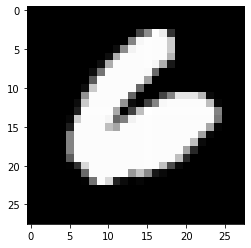

In [34]:
x = 7891
predict_image(test_dataset[x][0], model)
print(test_dataset[x][1])

ten, lab = test_dataset[x]

plt.imshow(ten[0],cmap='gray')
